<a href="https://colab.research.google.com/github/ramrajv/Ramraj_Prayag_Kaggle/blob/main/Test/TelecomChurn_Test_with_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis
### Load libraries

In [270]:
# Load libraries
import numpy as np
import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

from scipy.stats import norm
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [271]:
url = 'https://media.githubusercontent.com/media/ramrajv/Ramraj_Prayag_Kaggle/main/train.csv'
train = pd.read_csv(url)

In [272]:
url = 'https://raw.githubusercontent.com/ramrajv/Ramraj_Prayag_Kaggle/main/test%20(1).csv'
test = pd.read_csv(url)

### Check for unique values

In [273]:
df = train.copy()

In [274]:
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
circle_id,109,109,109,109,109
loc_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,0.0,0.0,0.0,0.0,0.0
last_date_of_month_6,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014
last_date_of_month_7,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014
last_date_of_month_8,8/31/2014,8/31/2014,8/31/2014,8/31/2014,8/31/2014
arpu_6,31.277,0.0,60.806,156.362,240.708
arpu_7,87.009,122.787,103.176,205.26,128.191


In [275]:
df.shape

(69999, 172)

In [276]:
# Drop id and target variable and form training dataframe

dfx = df.drop(['id','churn_probability'], axis = 1)

In [277]:
dfx.columns[dfx.isna().sum()/dfx.shape[0]>0]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object', length=125)

### Drop null data

#### Drop rows with all null values

In [278]:
dfx.dropna(how = 'all', inplace = True)

In [279]:
dfx.shape

(69999, 170)

In [280]:
dfx.sample(5).T

,28964,31667,22015,32832,59408
circle_id,109,109,109,109,109
loc_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,0.0,0.0,0.0,0.0,0.0
last_date_of_month_6,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014
last_date_of_month_7,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014
last_date_of_month_8,8/31/2014,8/31/2014,8/31/2014,8/31/2014,8/31/2014
arpu_6,138.01,251.352,206.807,278.146,102.938
arpu_7,189.455,258.734,239.354,272.575,102.078
arpu_8,85.839,543.477,256.479,153.218,0.0


#### Drop columns with null values in more than 70% of the rows

In [281]:
drop_cols = dfx.columns[dfx.isna().sum()/dfx.shape[0]>0.7]

In [282]:
drop_cols

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [283]:
len(drop_cols)

30

In [284]:
dfx.drop(drop_cols, axis = 1, inplace = True)

In [285]:
dfx.dropna(how = 'all',inplace = True)

In [286]:
dfx.shape

(69999, 140)

In [287]:
 # Use only independent variables for check

x = dfx.copy()

In [288]:
# Find columns having only a single unique value.

x.columns[x.nunique()==1]

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [289]:
# Drop columns with a single unique value.

x.drop(x.columns[x.nunique()==1], axis = 1, inplace = True)

In [290]:
x.shape

(69999, 127)

In [291]:
x.columns[x.nunique()==2]

Index([], dtype='object')

In [292]:
x.columns[x.nunique()<=20]

Index(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8'],
      dtype='object')

In [293]:
# Find categorical variables

cols = x.columns[x.nunique()<=20]
for col in cols:
  print(col,':',x[col].unique())

monthly_2g_6 : [0 1 2 3 4]
monthly_2g_7 : [0 1 2 4 3 5]
monthly_2g_8 : [0 1 2 4 3 5]
monthly_3g_6 : [0 1 2 4 3 5 6 8 7 9]
monthly_3g_7 : [ 0  1  2  3  5  4  8  6  7 16 14  9 10]
monthly_3g_8 : [ 0  1  2  3  4  8  5  6  9  7 16 10]


In [294]:
# Store categorical variables.

cat_vars = cols

### Get object columns and change data types to int/ float

In [295]:
obj = x.columns[x.dtypes=='O']
obj

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [296]:
for element in obj:
  x[element] = pd.to_datetime(x[element])

In [297]:
for element in obj:
  x[element] = (x[element] - x[element].min()).dt.days

In [298]:
x[obj].describe().T

,count,mean,std,min,25%,50%,75%,max
date_of_last_rech_6,68898.0,23.128131,6.134773,0.0,20.0,26.0,28.0,29.0
date_of_last_rech_7,68765.0,24.505708,5.765762,0.0,22.0,26.0,29.0,30.0
date_of_last_rech_8,67538.0,24.441988,6.108002,0.0,23.0,26.0,29.0,30.0


### Null value imputation

In [299]:
x_copy = x.copy()

In [300]:
noncat = x.drop(cat_vars, axis = 1).columns
noncat

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=121)

In [301]:
n_cat = x[noncat]
med_cols = n_cat[n_cat.columns[abs(n_cat.mean() - n_cat.median())/n_cat.median()>=0.5]].columns

In [302]:
mean_cols = n_cat.drop(med_cols, axis = 1).columns

In [303]:
# Impute null values as per mean or median values

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imp_med = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imp_mean = imp_mean.fit(x[mean_cols])
imp_med = imp_med.fit(x[med_cols])
x[mean_cols] = imp_mean.transform(x[mean_cols])
x[med_cols] = imp_med.transform(x[med_cols])

In [304]:
# Check for null values

x.columns[x.isna().sum()/x.shape[0]>0]

Index([], dtype='object')

In [305]:
# Check for infinite values

print("Printing the count of infinity values")
  
count = np.isinf(x).values.sum()
print("Train dataset contains " + str(count) + " infinite values")

Printing the count of infinity values
Train dataset contains 0 infinite values


In [306]:
# Check for two unique values

two_unq_cols = x.columns[x.nunique()==2]
two_unq_cols

Index([], dtype='object')

In [307]:
# Check for null values in categorical variables

x[cat_vars].isna().sum()/x[cat_vars].shape[0]*100

monthly_2g_6    0.0
monthly_2g_7    0.0
monthly_2g_8    0.0
monthly_3g_6    0.0
monthly_3g_7    0.0
monthly_3g_8    0.0
dtype: float64

There are no null values in the dataset

## Data Preparation

In [308]:
x_copy = x.copy()

In [309]:
x.shape

(69999, 127)

In [310]:
test.shape

(30000, 171)

In [311]:
xt = test[x.columns]

In [312]:
obj

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

#### Treat object variables in test set

In [313]:
for ele in obj:
    xt[ele] = pd.to_datetime(xt[ele])
    xt[ele] = (xt[ele] - xt[ele].min()).dt.days

#### Impute null values in test set

In [314]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imp_med = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
impt_mean = imp_mean.fit(xt[mean_cols])
impt_med = imp_med.fit(xt[med_cols])
xt[mean_cols] = impt_mean.transform(xt[mean_cols])
xt[med_cols] = impt_med.transform(xt[med_cols])

In [315]:
x.shape

(69999, 127)

In [316]:
xt.shape

(30000, 127)

### Check for single unique values

Drop columns with single unique values

In [317]:
single_unique_cols = x.columns[x.nunique()==1]
single_unique_cols

Index([], dtype='object')

#### Categorical Variables Treatment

In [318]:
cat_vars = x.columns[x.nunique()<20]

In [319]:
cat_vars

Index(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8'],
      dtype='object')

In [320]:
for col in cat_vars:
    print(col, x[col].unique())

monthly_2g_6 [0 1 2 3 4]
monthly_2g_7 [0 1 2 4 3 5]
monthly_2g_8 [0 1 2 4 3 5]
monthly_3g_6 [0 1 2 4 3 5 6 8 7 9]
monthly_3g_7 [ 0  1  2  3  5  4  8  6  7 16 14  9 10]
monthly_3g_8 [ 0  1  2  3  4  8  5  6  9  7 16 10]


In [321]:
# Concat both train and test dataframe

x_all = pd.concat([x,xt])

In [322]:
x_all.shape

(99999, 127)

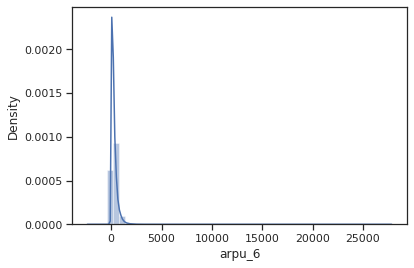

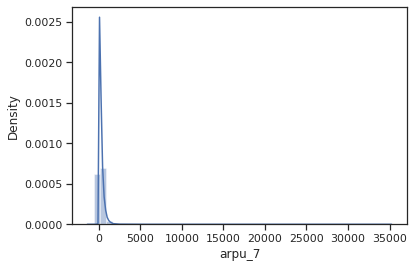

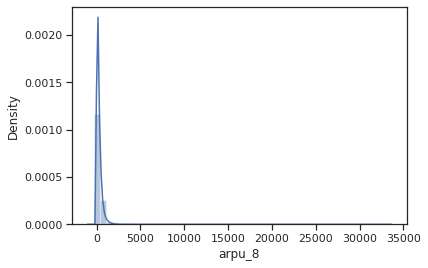

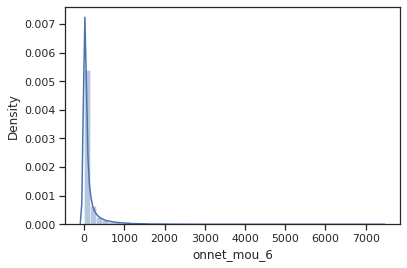

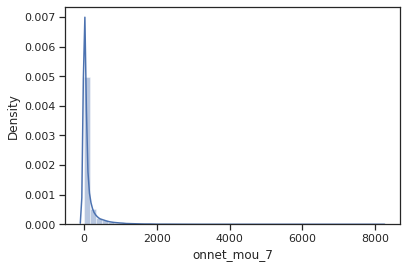

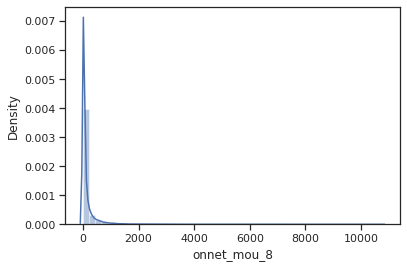

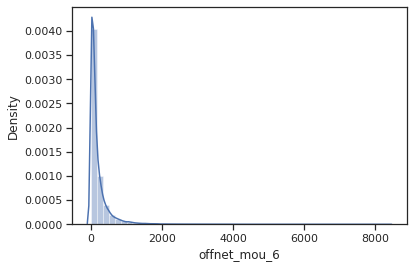

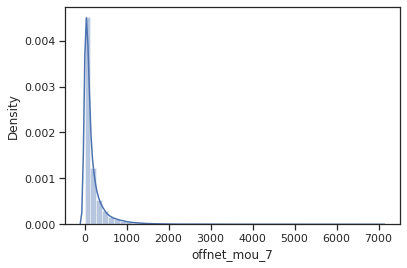

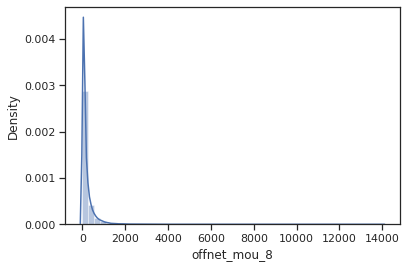

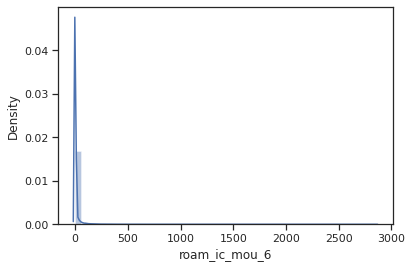

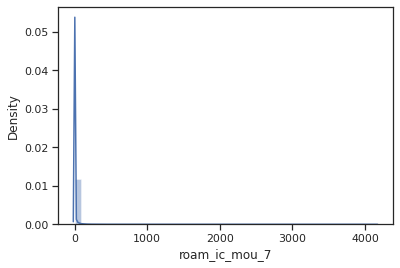

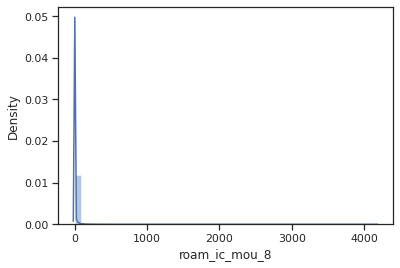

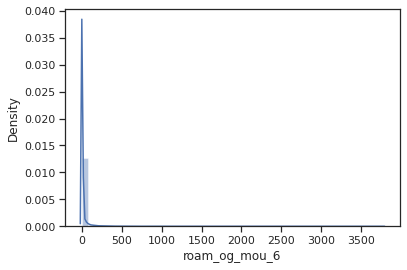

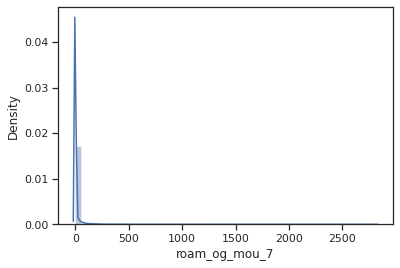

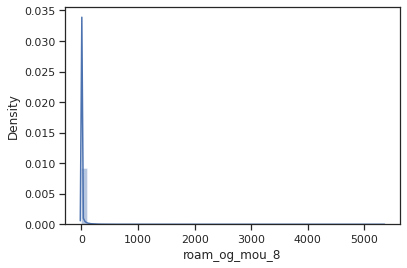

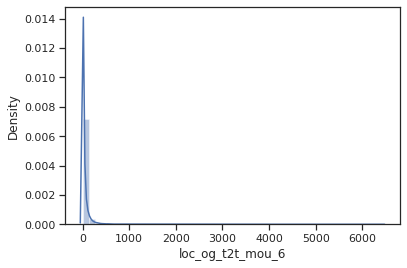

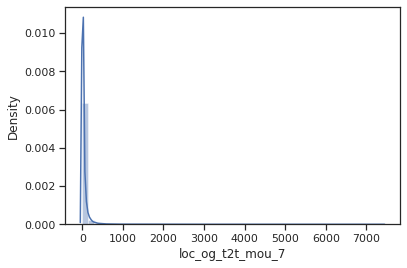

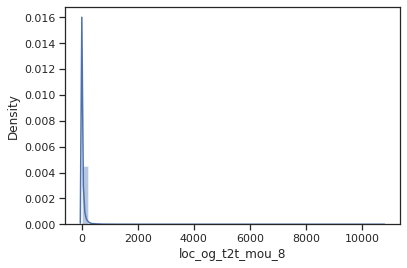

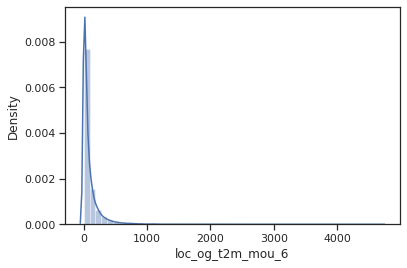

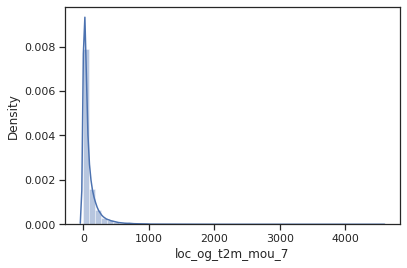

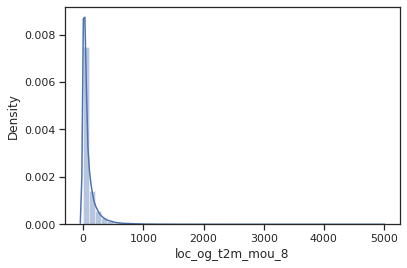

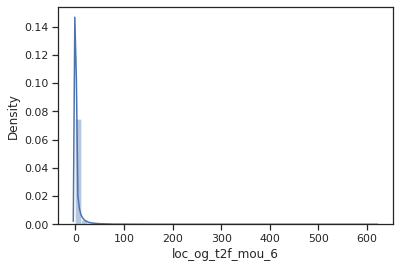

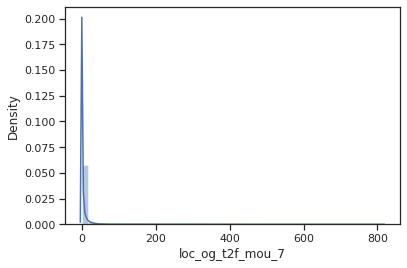

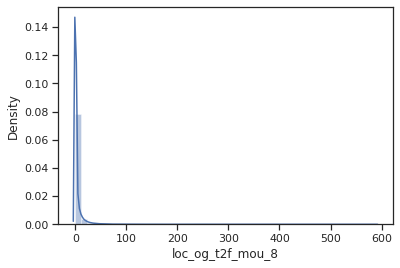

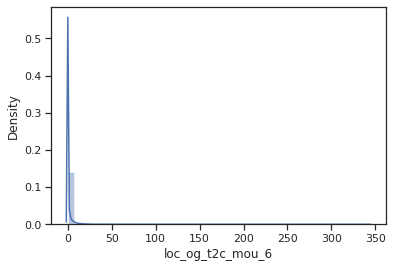

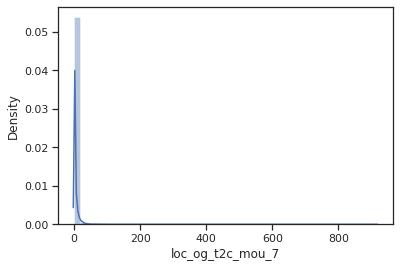

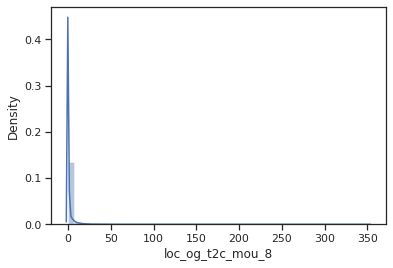

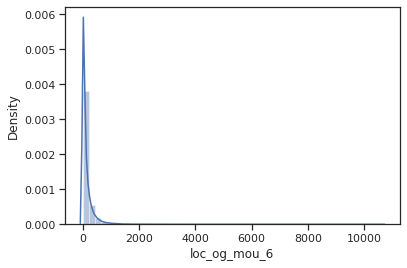

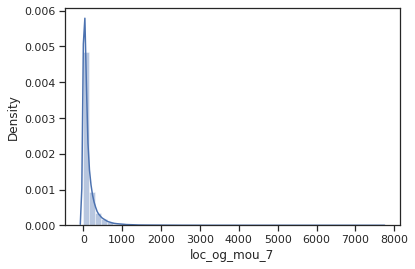

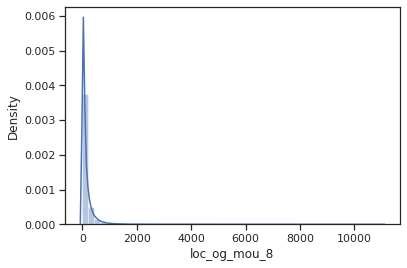

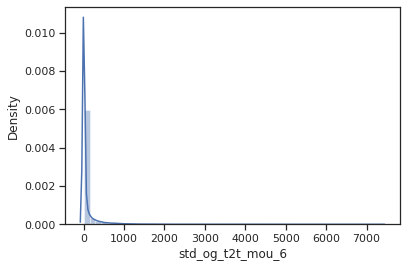

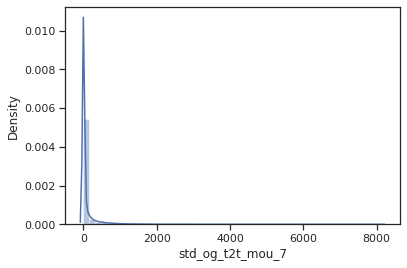

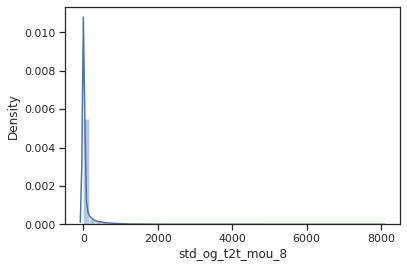

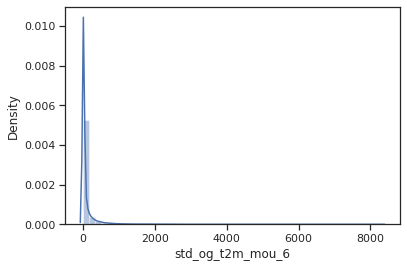

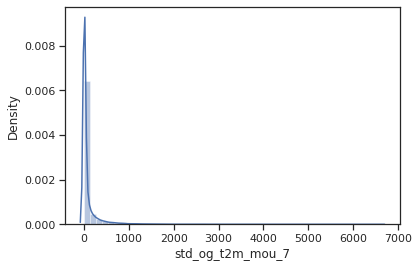

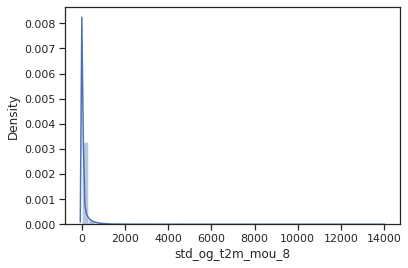

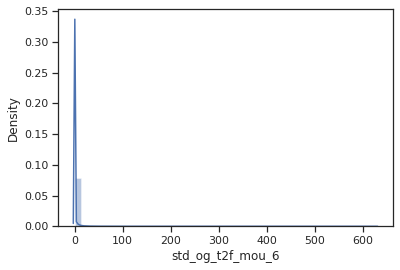

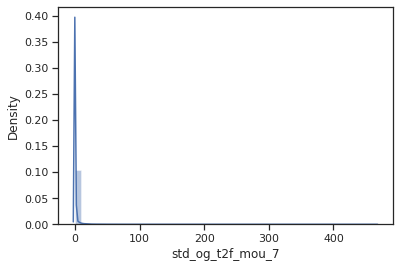

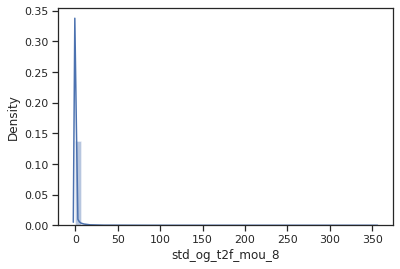

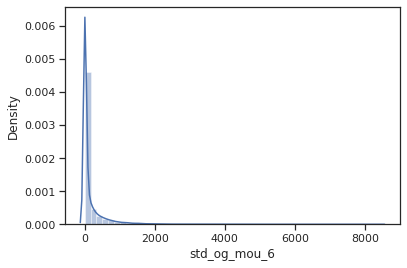

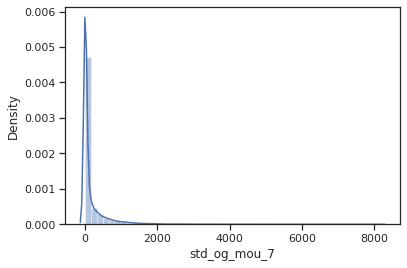

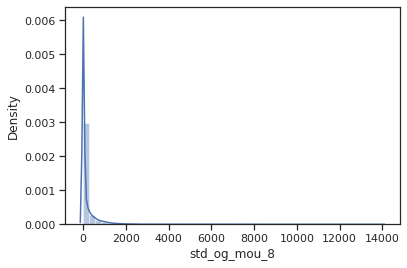

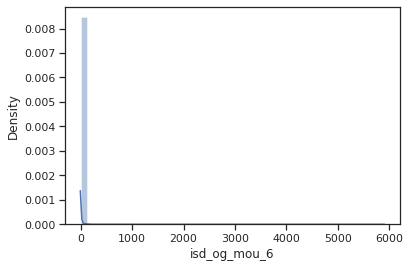

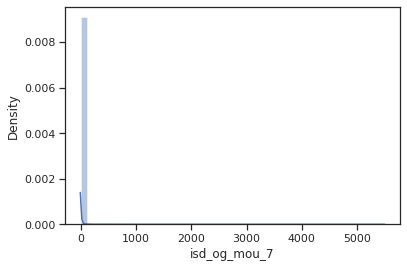

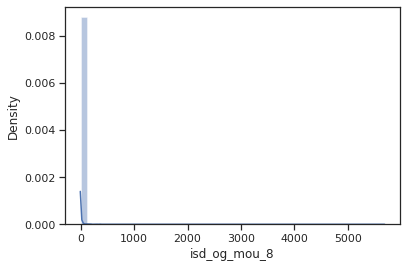

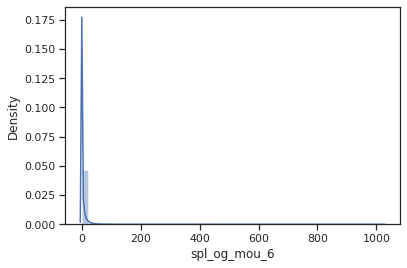

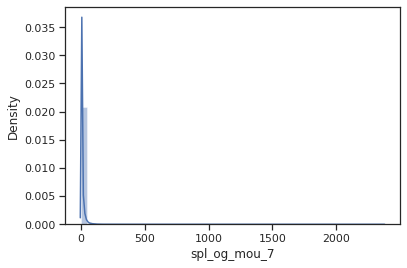

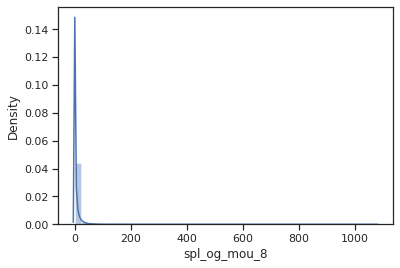

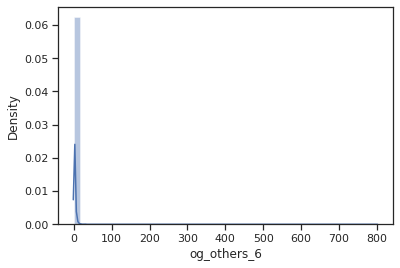

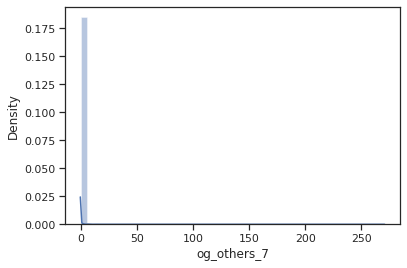

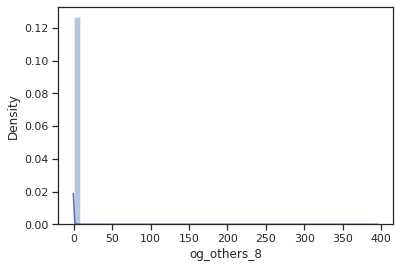

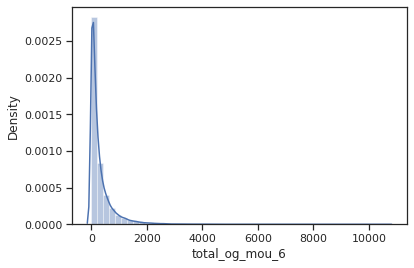

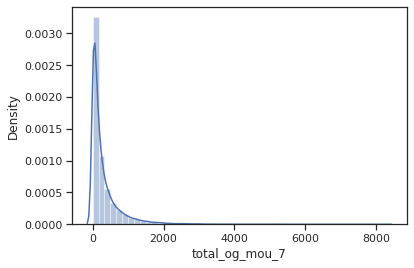

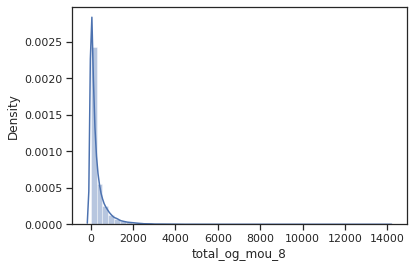

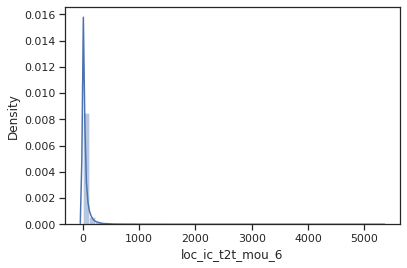

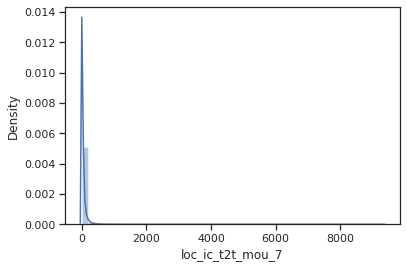

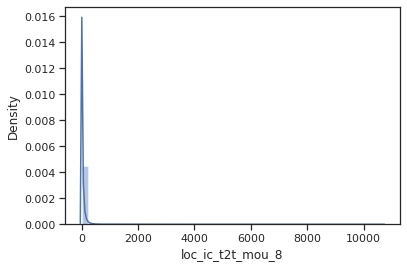

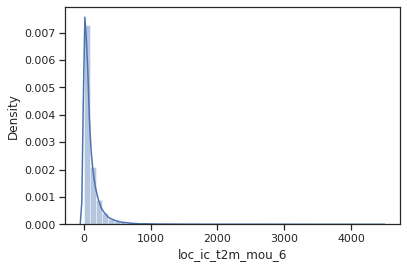

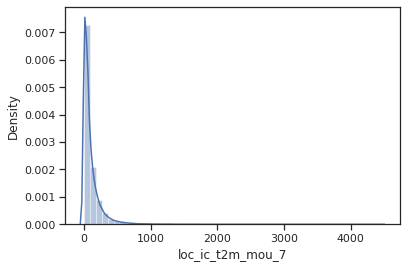

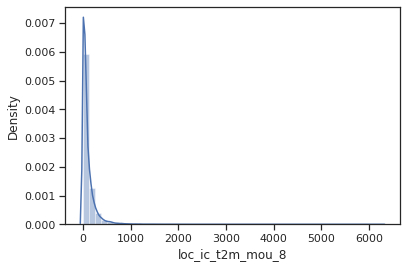

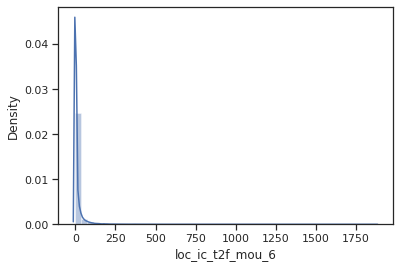

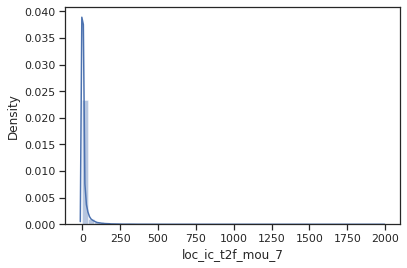

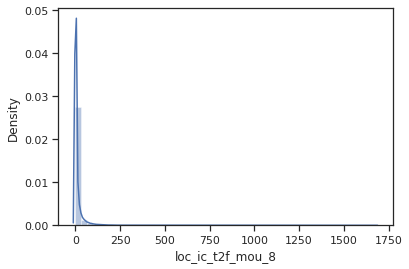

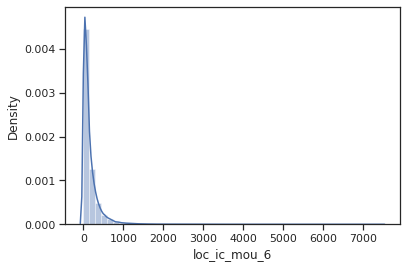

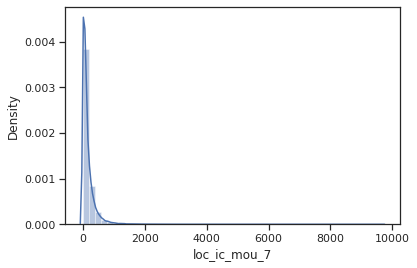

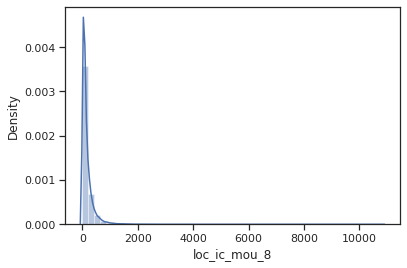

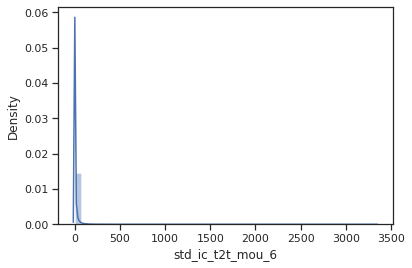

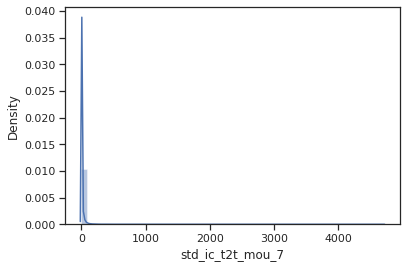

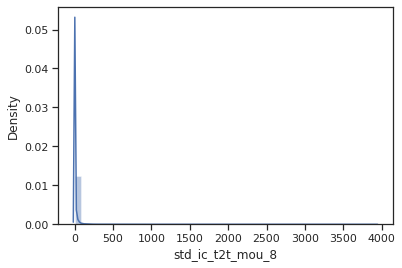

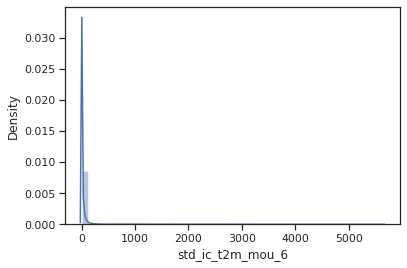

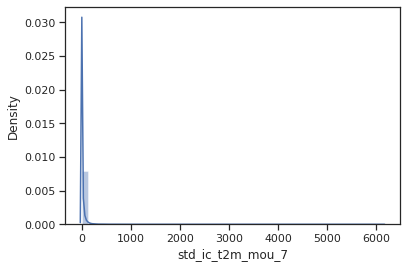

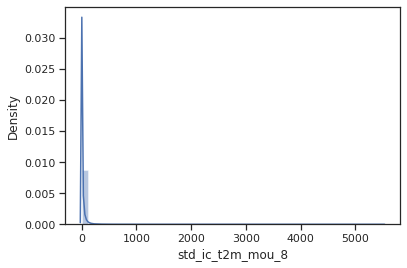

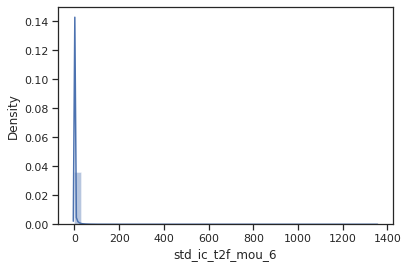

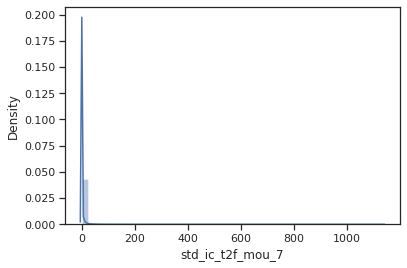

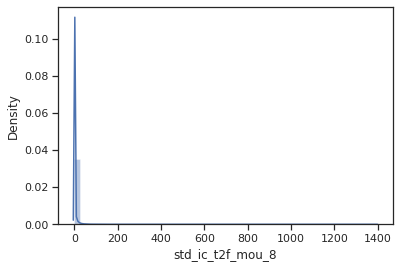

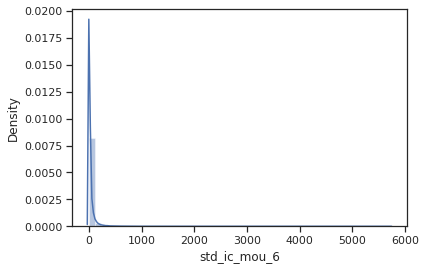

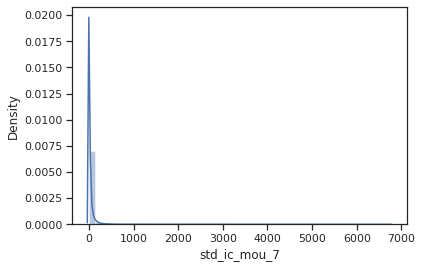

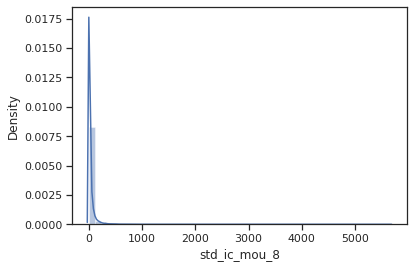

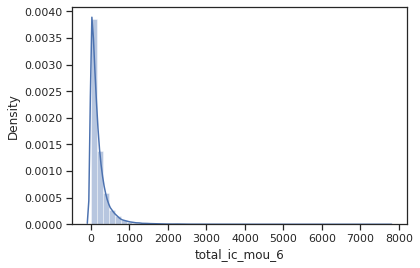

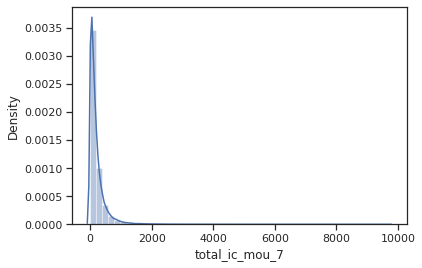

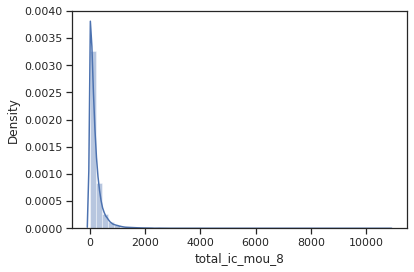

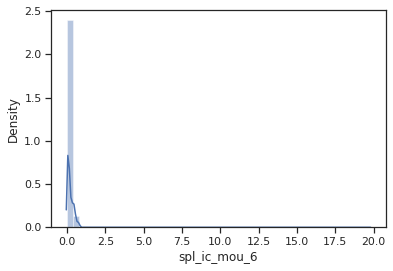

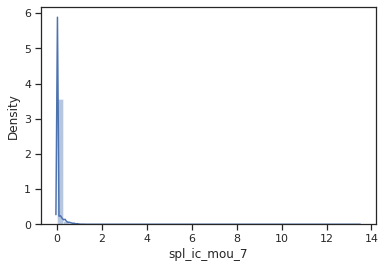

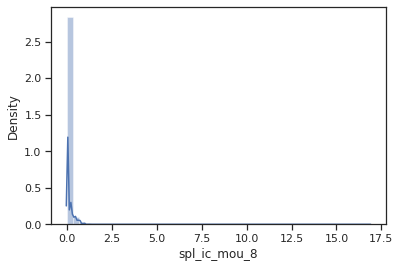

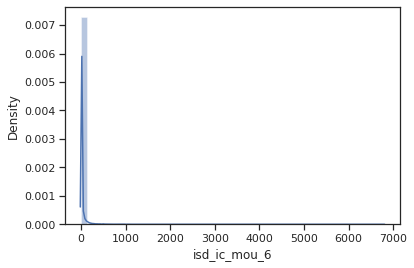

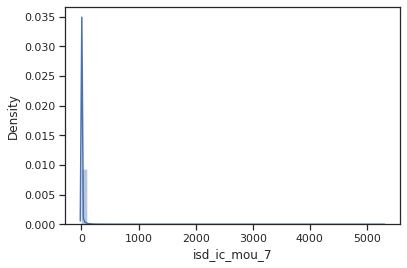

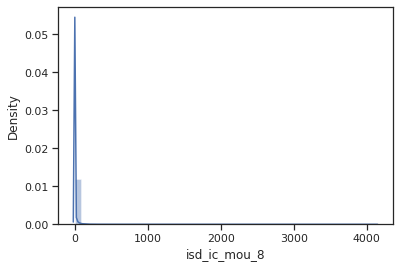

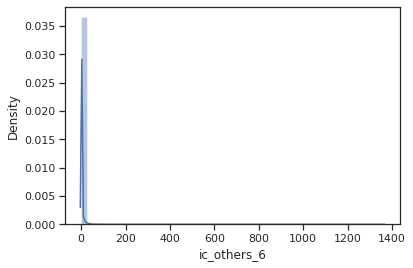

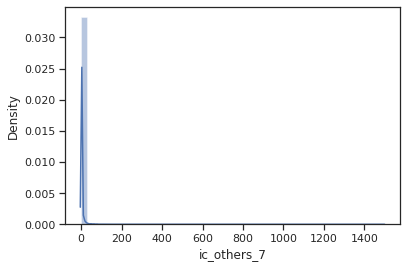

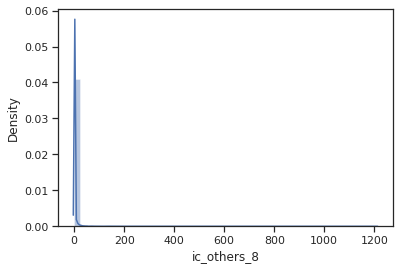

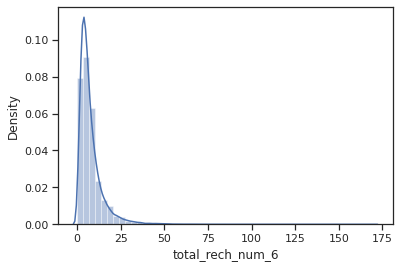

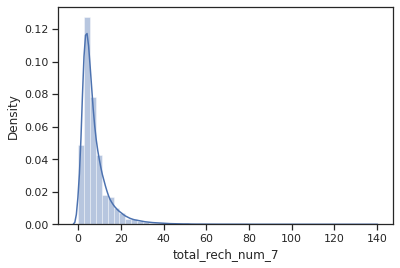

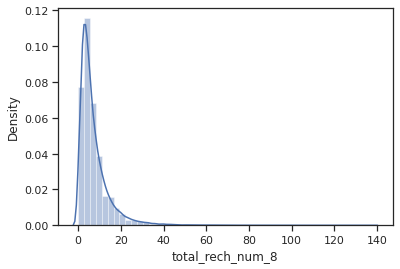

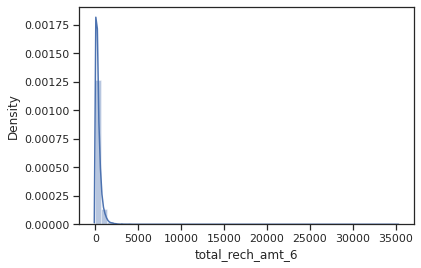

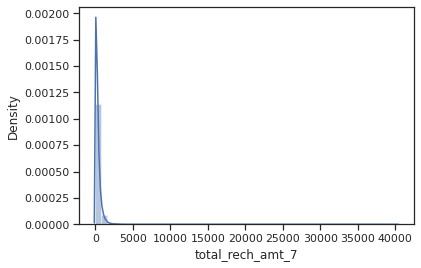

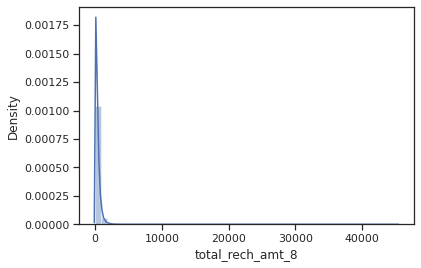

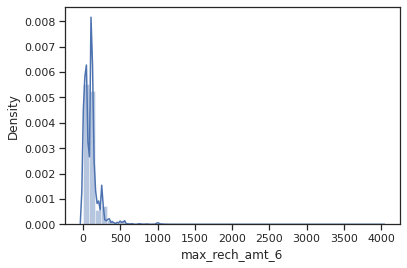

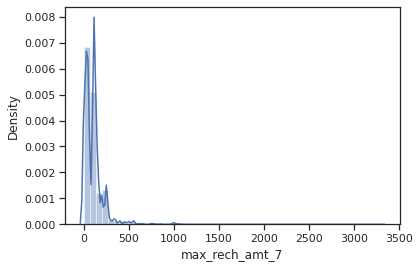

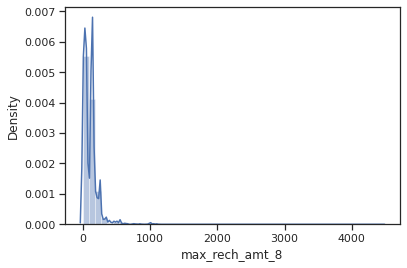

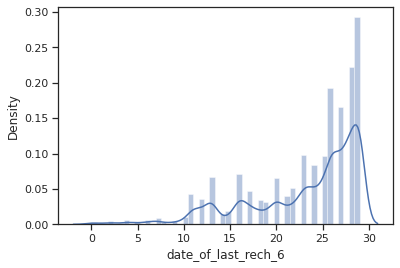

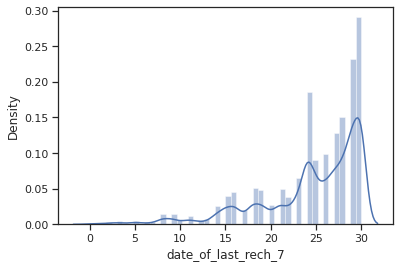

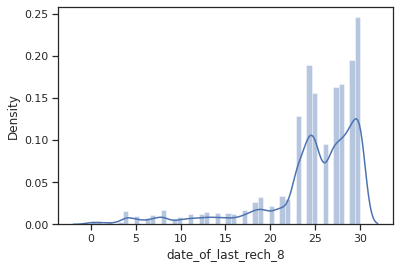

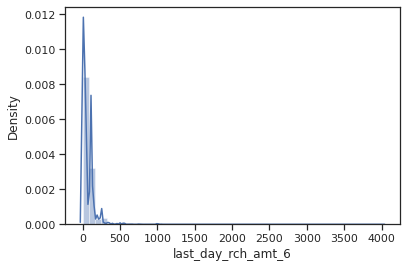

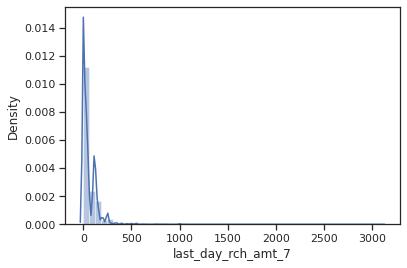

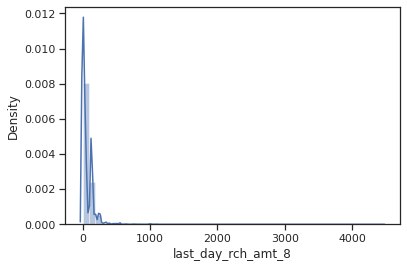

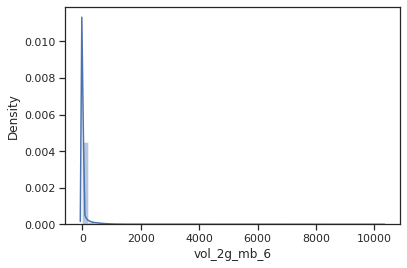

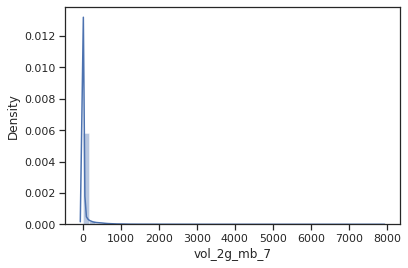

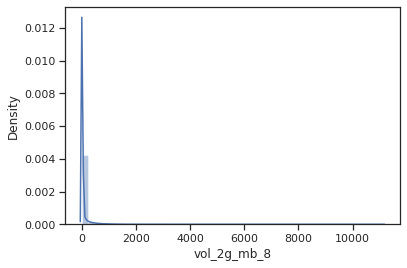

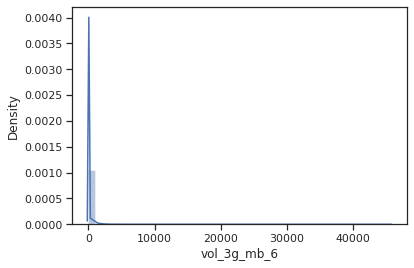

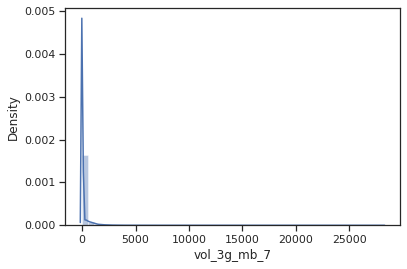

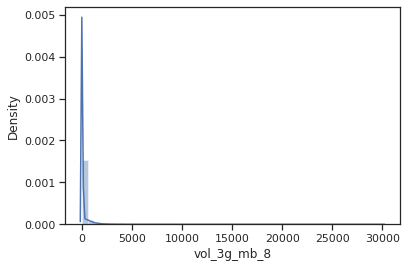

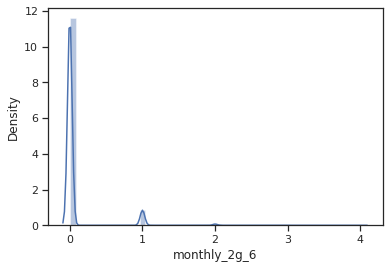

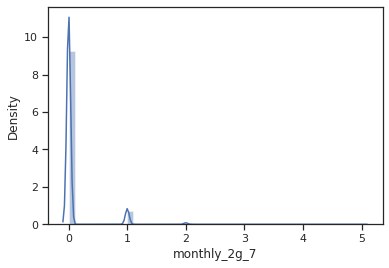

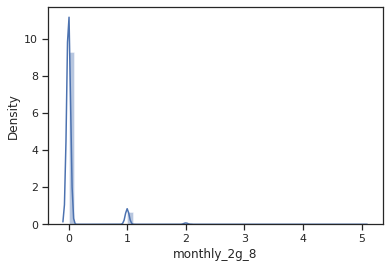

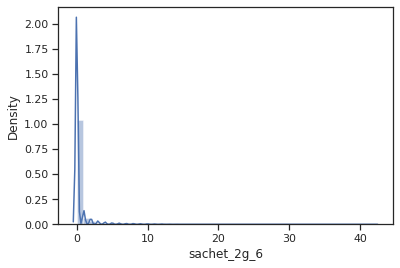

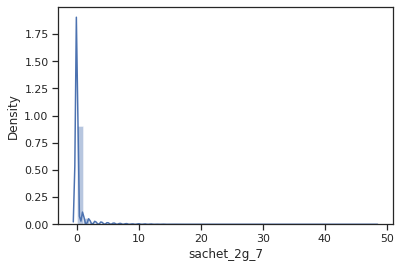

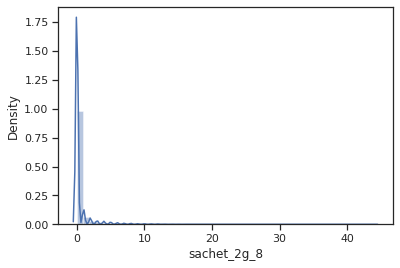

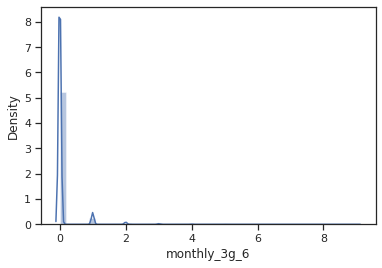

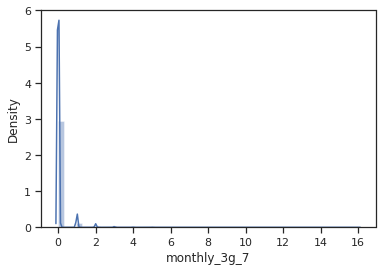

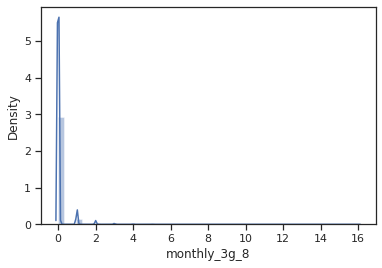

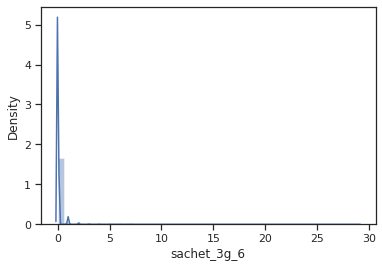

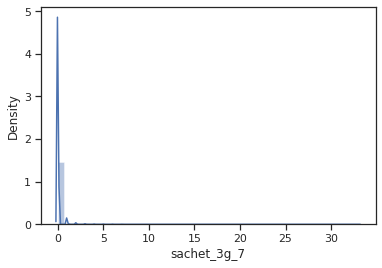

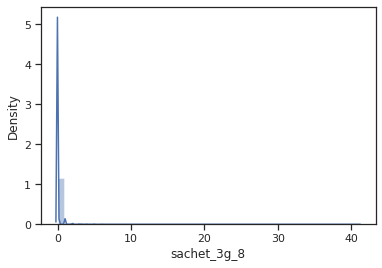

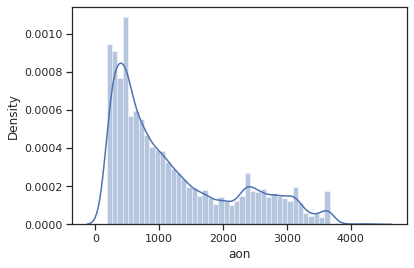

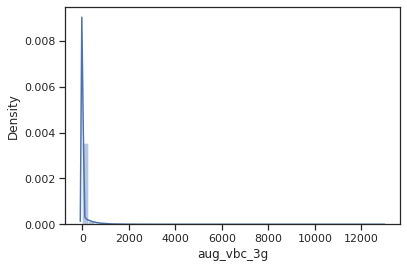

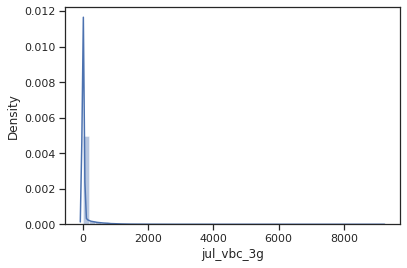

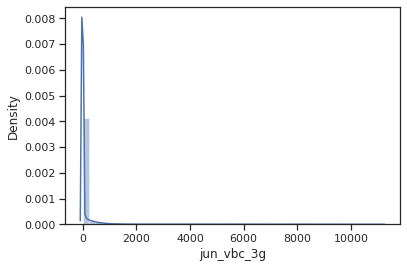

In [323]:
for col in x.columns:
    plt.figure()
    sns.distplot(x[col])
    plt.show()

In [324]:
# Get dummies for categorical variables.

x_all = pd.get_dummies(data=x_all, columns=cat_vars, drop_first = True)

In [325]:
# Separate out test dataframe

xt = x_all.iloc[-30000:]

In [326]:
xt.shape

(30000, 171)

In [327]:
# Get the train dataset

x = x_all.iloc[:-30000]

In [328]:
x.shape

(69999, 171)

In [329]:
# Get target variable

y = df['churn_probability']

In [330]:
# Get skewness of target variable

y.skew()

2.632208435650454

### Skewness Treatment

The skew is more than 1 - High skewness. There is a need to stratify

In [331]:
# Train test splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, \
                                                    test_size=0.25, \
                                                    random_state = 100, \
                                                    stratify=y)

In [332]:
X_train.shape

(52499, 171)

In [333]:
y_train.shape

(52499,)

In [334]:
# Undertake standard scaling of independent variables.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_unseen = scaler.transform(xt)

Since we are using standard scaler, the standard deviation should be 1 and mean 0. How do we address this? Shall we use min max scaler instead? No. Min max scaler has no bounds like for standard scaler. Yes. But it will not break any rule.

Maybe We can check with min max scaler too.

ok, I'll put min max scaler too.

In [335]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_m = scaler.fit_transform(X_train)
X_test_m = scaler.transform(X_test)
X_unseen_m = scaler.transform(xt)

In [336]:
# Check for scaling in independent variables

df_train = pd.DataFrame(X_train, columns = x.columns)
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,52499.0,-2.125599e-16,1.00001,-7.673722,-0.571863,-0.257771,0.263829,82.862033
arpu_7,52499.0,3.390157e-17,1.00001,-4.507347,-0.551752,-0.248822,0.251346,100.261270
arpu_8,52499.0,-1.237023e-17,1.00001,-3.547012,-0.564307,-0.250763,0.267286,96.386162
onnet_mou_6,52499.0,-2.355727e-16,1.00001,-0.436732,-0.409598,-0.321899,-0.053082,24.397195
onnet_mou_7,52499.0,1.088600e-16,1.00001,-0.423414,-0.399921,-0.318668,-0.066635,26.047920
onnet_mou_8,52499.0,-7.604600e-17,1.00001,-0.416496,-0.392808,-0.312192,-0.069142,34.522128
offnet_mou_6,52499.0,1.005966e-16,1.00001,-0.627679,-0.509054,-0.317853,0.096100,26.226389
offnet_mou_7,52499.0,-1.682644e-16,1.00001,-0.610059,-0.502737,-0.320788,0.080447,21.565629
offnet_mou_8,52499.0,-1.830888e-16,1.00001,-0.611006,-0.501262,-0.318439,0.082343,23.164718
roam_ic_mou_6,52499.0,-1.977007e-16,1.00001,-0.166787,-0.166787,-0.166787,-0.166787,49.726234


## PCA Components

In [337]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95, svd_solver = 'full', random_state = 100)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)

In [338]:
pca_m = PCA(n_components = 0.95, svd_solver = 'full', random_state = 100)
principalComponents_m = pca_m.fit_transform(X_train_m)
principalDf_m = pd.DataFrame(data = principalComponents_m)

In [339]:
test_components = pca.transform(X_test)
X_test_pca = pd.DataFrame(data = test_components)

In [340]:
test_components_m = pca_m.transform(X_test_m)
X_test_pca_m = pd.DataFrame(data = test_components_m)

## Logistics Regression with PCA

In [341]:
from sklearn.linear_model import LogisticRegression
X_train_pca = principalDf.copy()
logistic=LogisticRegression()
logistic.fit(X=X_train_pca,y=y_train)
logistic.predict(X_test_pca)
score_2=logistic.score(X_test_pca,y_test)
print(score_2)

0.904


In [342]:
pred_proba = logistic.predict_proba(X_test_pca)

In [343]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_proba[:,1]))

'0.88'

In [344]:
X_train_pca_m = principalDf_m.copy()
logistic_m=LogisticRegression()
logistic_m.fit(X=X_train_pca_m,y=y_train)
logistic_m.predict(X_test_pca_m)
score_2_m=logistic_m.score(X_test_pca_m,y_test)
print(score_2_m)

0.9002285714285714


In [345]:
pred_proba_m = logistic_m.predict_proba(X_test_pca_m)

In [346]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_proba[:,1]))

'0.88'

In [347]:
# Transform on unseen data

pcomp_unseen = pca.transform(xt)
princDf_unseen = pd.DataFrame(data = pcomp_unseen)

In [348]:
pcomp_unseen_m = pca_m.transform(xt)
princDf_unseen_m = pd.DataFrame(data = pcomp_unseen_m)

In [349]:
unseen_predict = logistic.predict(princDf_unseen)
unseen_predict_m = logistic_m.predict(princDf_unseen_m)

In [350]:
unseen_pred = pd.DataFrame(unseen_predict)
unseen_pred_m = pd.DataFrame(unseen_predict_m)

In [351]:
unseen_pred.groupby(0)[0].count()

0
0    29416
1      584
Name: 0, dtype: int64

In [352]:
unseen_pred_m.groupby(0)[0].count()

0
0    28459
1     1541
Name: 0, dtype: int64

In [353]:
unseen_pred = unseen_pred.reset_index()
unseen_pred_m = unseen_pred_m.reset_index()

In [354]:
unseen_pred.columns

Index(['index', 0], dtype='object')

In [355]:
unseen_pred.rename(columns={'index':'id',0:'churn_probability'}, inplace=True)
unseen_pred_m.rename(columns={'index':'id',0:'churn_probability'}, inplace=True)

In [356]:
unseen_pred.columns

Index(['id', 'churn_probability'], dtype='object')

In [357]:
unseen_pred['id'] = unseen_pred['id'] + 69999
unseen_pred_m['id'] = unseen_pred_m['id'] + 69999

In [358]:
unseen_pred.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [359]:
unseen_pred.to_csv('Ram_Prayag.csv',index = False)
unseen_pred_m.to_csv('Ram_Prayag_m.csv',index = False)

## Using k-band with Cross Validation

Use logistics regression cv tool of sklearn on pca components

### With PCA

In [360]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, scoring='roc_auc', n_jobs=-1)
cvComponents = clf.fit(X_train_pca, y_train)

In [361]:
clf.predict(X_test_pca)

array([0, 0, 0, ..., 0, 0, 0])

In [362]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, clf.predict_proba(X_train_pca)[:, 1])

0.8774869605264124

### Using plain x and y with LogisticsRegressionCV

In [363]:
clf = LogisticRegressionCV(cv=5, scoring='roc_auc', n_jobs=-1, random_state = 100)
clf.fit(x,y)
roc_auc_score(y, clf.predict_proba(x)[:, 1])

KeyboardInterrupt: ignored

In [ ]:
cv_unseen = clf.predict(xt)
cv_unseen = pd.DataFrame(cv_unseen)
cv_unseen.head()

In [ ]:
cv_unseen.reset_index(inplace = True)

In [ ]:
cv_unseen.rename(columns = {'index':'id',0:'churn_probability'}, inplace = True)

In [ ]:
cv_unseen['id'] = cv_unseen['id'] + 69999

In [ ]:
cv_unseen.groupby('churn_probability')['churn_probability'].count()

In [ ]:
cv_unseen.to_csv('Ram_Prayag_clf5.csv', index=False)

## Support Vector Machine

In [ ]:
import numpy as np
import cvxopt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [ ]:
y_train.shape

In [ ]:
X_train.shape

In [ ]:
from sklearn import svm

In [ ]:
# svm = svm.SVC()
# svm.fit(X_train, y_train)

In [ ]:
# y_pred = svm.predict(X_test)
# confusion_matrix(y_test, y_pred)

In [ ]:
# svc = LinearSVC()
# svc.fit(X_train, y_train)

In [ ]:
# y_pred_svc = svc.predict(X_test)
# confusion_matrix(y_test, y_pred_svc)

In [ ]:
# svm_unseen = svm.predict(xt)
# svm_unseen = svc.predict(xt)

In [ ]:
# svm_unseen

In [ ]:
# svm_unseen = pd.DataFrame(svm_unseen)

In [ ]:
# svm_unseen.reset_index(inplace = True)
# svm_unseen.rename(columns = {'index':'id',0:'churn_probability'}, inplace = True)
# svm_unseen.to_csv('Ram_Prayag_svm.csv', index=False)

In [ ]:
# svm_unseen.groupby('churn_probability')['churn_probability'].count()

In [ ]:
# svc_unseen = svm_unseen.copy()
# svc_unseen['id'] = svc_unseen['id'] + 69999
# svc_unseen.to_csv('Ram_Prayag_svc.csv', index=False)

## Random Forest

In [364]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [374]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=x.columns, 
                    class_names=['Churn', "No Churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [366]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [367]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [368]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [369]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [370]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [371]:
sample_tree = rf.estimators_[4]

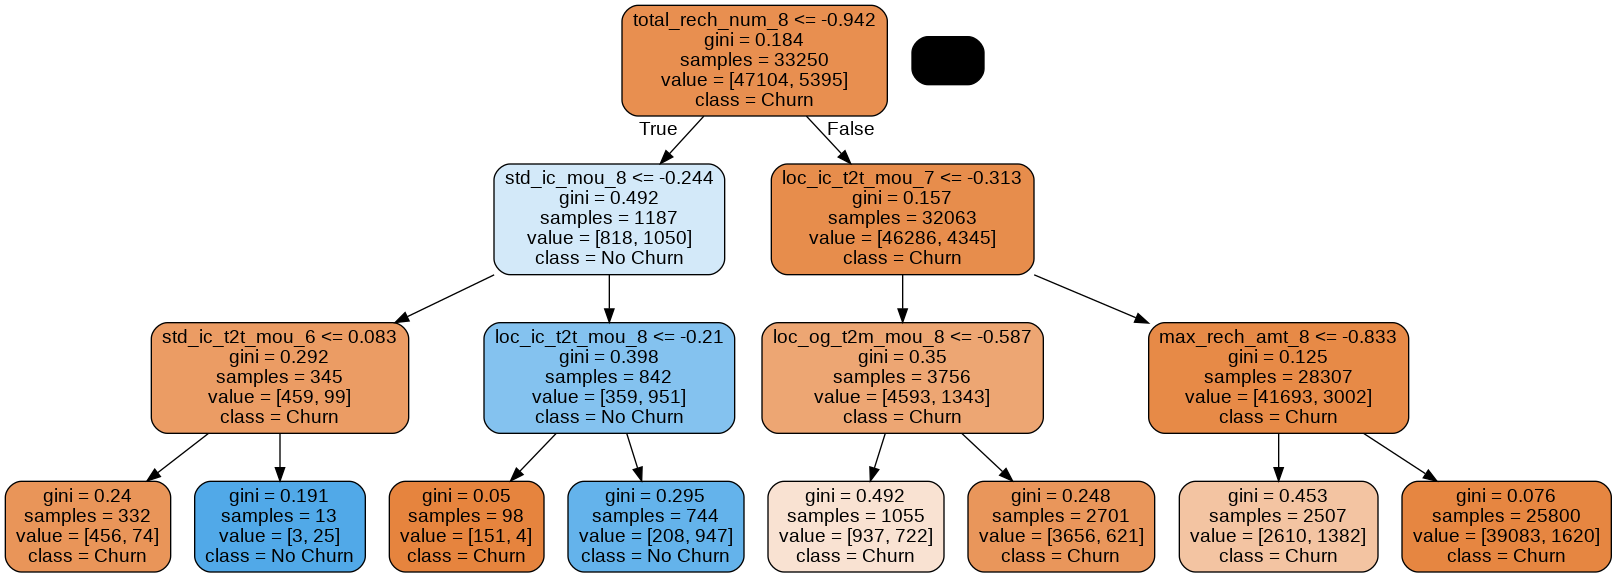

In [375]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=1000, height=700)

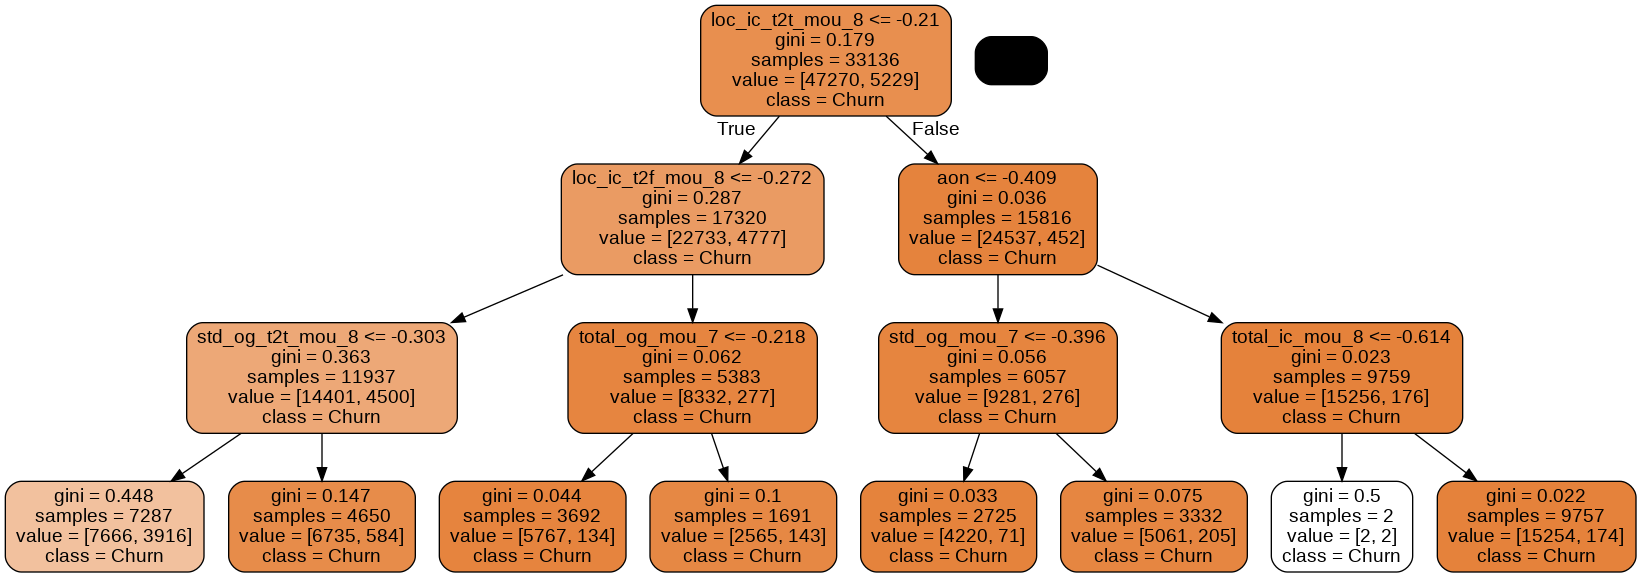

In [376]:
gph = get_dt_graph(rf.estimators_[2])
Image(gph.create_png(), width=1000, height=700)

In [377]:
evaluate_model(rf)

Train Accuracy : 0.9290462675479533
Train Confusion Matrix:
[[46792   358]
 [ 3367  1982]]
--------------------------------------------------
Test Accuracy : 0.9290285714285714
Test Confusion Matrix:
[[15608   109]
 [ 1133   650]]


In [384]:
rf_us = rf.predict(xt)
rf_us = pd.DataFrame(rf_us)
rf_us.reset_index(inplace = True)
rf_us.rename(columns = {'index':'id',0:'churn_probability'}, inplace = True)
rf_us['id'] = rf_us['id'] + 69999
rf_us.to_csv('Ram_Prayag_rf.csv', index = False)

In [385]:
rf_us.groupby('churn_probability')['churn_probability'].count()

churn_probability
0    30000
Name: churn_probability, dtype: int64

#### Grid search for hyper-parameter tuning

In [378]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [390]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10],
    'min_samples_leaf': [5, 10, 20, 50],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100]
}

In [391]:
# Instantiate the grid search model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=2, n_jobs=-1, verbose=1, scoring = "accuracy")

In [392]:
%%time
grid_search.fit(x,y)

Fitting 2 folds for each of 192 candidates, totalling 384 fits


KeyboardInterrupt: ignored

In [387]:
rf_best = grid_search.best_estimator_

AttributeError: ignored

In [ ]:
rf_best

In [ ]:
evaluate_model(rf_best)

In [ ]:
sample_tree = rf_best.estimators_[0]

In [ ]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

In [ ]:
gph = get_dt_graph(rf_best.estimators_[0])
Image(gph.create_png(), height=600, width=600)

In [ ]:
gph = get_dt_graph(rf_best.estimators_[10])
Image(gph.create_png(), height=600, width=600)

### Variable importance in RandomForest and Decision trees

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [ ]:
classifier_rf.fit(X_train, y_train)

In [ ]:
classifier_rf.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)